In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

%matplotlib inline

In [2]:
gm = pd.read_csv('TFT_GrandMaster_MatchData.csv')

In [3]:
gm.head()

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4254769102,2319.661377,9,38,1,2311.472168,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
1,KR_4254769102,2319.661377,9,38,2,2311.472168,"{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, '...","{'Fiora': {'items': [], 'star': 2}, 'Leona': {..."
2,KR_4254769102,2319.661377,9,37,3,2247.994873,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [], 'star': 3}, 'Sona':..."
3,KR_4254769102,2319.661377,7,33,4,1996.358643,"{'DarkStar': 2, 'Demolitionist': 1, 'Infiltrat...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."
4,KR_4254769102,2319.661377,8,31,5,1871.789551,"{'Chrono': 1, 'Cybernetic': 1, 'DarkStar': 3, ...","{'Leona': {'items': [], 'star': 1}, 'Mordekais..."


In [4]:
gm.isnull().sum()

gameId            0
gameDuration      0
level             0
lastRound         0
Ranked            0
ingameDuration    0
combination       0
champion          0
dtype: int64

### 게임 소요 시간
#### - 최소 2분, 평균 36분, 최대 46분

In [5]:
gm_time = round(gm.gameDuration.agg(['min','mean','max']).to_frame() / 60)
gm_time.columns = ['gameDuration (min)']
gm_time

,gameDuration (min)
min,2.0
mean,36.0
max,46.0


### 전체 순위

In [6]:
combinations = gm.combination.apply(lambda x: re.findall('[a-zA-Z]+[0-9]?_?[a-zA-Z]+',x)).to_frame()
combinations

,combination
0,"[Blaster, Chrono, Cybernetic, Mercenary, Rebel..."
1,"[Blaster, Chrono, Cybernetic, Infiltrator, Man..."
2,"[DarkStar, Protector, Rebel, Set3_Celestial, S..."
3,"[DarkStar, Demolitionist, Infiltrator, MechPil..."
4,"[Chrono, Cybernetic, DarkStar, Set3_Celestial,..."
...,...
79995,"[Blaster, Chrono, Cybernetic, Mercenary, Rebel..."
79996,"[Blaster, Chrono, Demolitionist, ManaReaver, M..."
79997,"[Blaster, Chrono, Cybernetic, Rebel, Set3_Braw..."
79998,"[Blaster, Chrono, Cybernetic, ManaReaver, Rebe..."


In [7]:
all_combi = Counter()
for combi in combinations.combination:
    all_combi += Counter(combi)

all_combi

Counter({'Blaster': 35677,
         'Chrono': 58096,
         'Cybernetic': 44289,
         'Mercenary': 26465,
         'Rebel': 33231,
         'Set3_Blademaster': 32141,
         'Set3_Brawler': 34420,
         'Set3_Void': 34385,
         'Valkyrie': 35796,
         'Infiltrator': 24045,
         'ManaReaver': 33260,
         'Vanguard': 39765,
         'DarkStar': 37737,
         'Protector': 18423,
         'Set3_Celestial': 36152,
         'Set3_Mystic': 27029,
         'Sniper': 19866,
         'StarGuardian': 21061,
         'Demolitionist': 15479,
         'MechPilot': 11557,
         'Set3_Sorcerer': 26785,
         'SpacePirate': 31186,
         'Starship': 4840,
         'TemplateTrait': 14315})

#### - 전체 시너지 TOP3: 1. Chrono(시공간), 2. Cybernetic(사이버네틱), 3. Vanguard(선봉대)

In [8]:
all_combi = pd.DataFrame.from_dict(all_combi, orient='index', columns=['Count']).reset_index()
all_combi = all_combi.sort_values(['Count'], ascending=False)
all_combi.columns = ['Combination','Count']
all_combi = all_combi.reset_index(drop=True)
all_combi

,Combination,Count
0,Chrono,58096
1,Cybernetic,44289
2,Vanguard,39765
3,DarkStar,37737
4,Set3_Celestial,36152
5,Valkyrie,35796
6,Blaster,35677
7,Set3_Brawler,34420
8,Set3_Void,34385
9,ManaReaver,33260


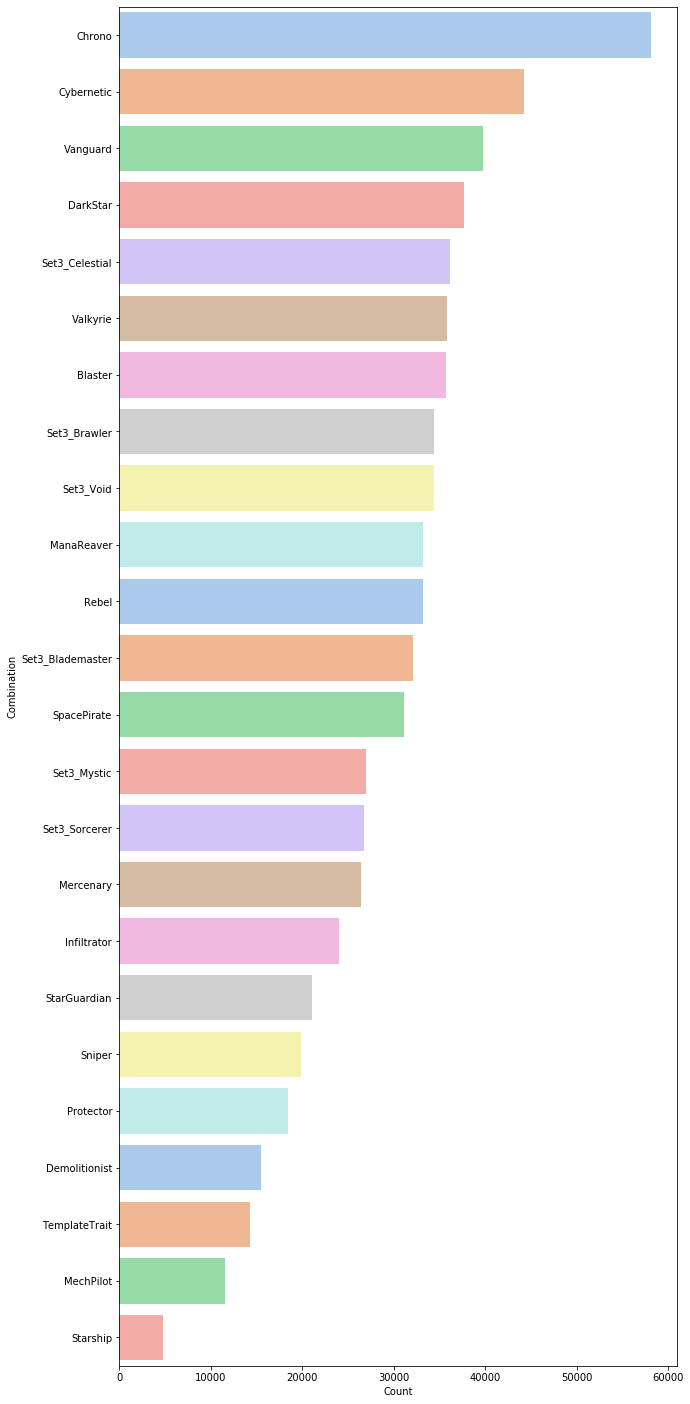

In [9]:
plt.rcParams['figure.figsize'] = (10,25)
sns.barplot(x = 'Count', y = 'Combination', data=all_combi, palette = 'pastel')
plt.show()

#### - 직업 시너지 TOP3: 1. Vanguard(선봉대), 2. Blaster(총잡이), 3. Brawler(싸움꾼)

In [32]:
Classes = all_combi.iloc[[2, 6, 7, 9, 11, 13, 14, 15, 16, 18, 19, 20, 23], :].reset_index(drop=True)
Classes

,Combination,Count
0,Vanguard,39765
1,Blaster,35677
2,Set3_Brawler,34420
3,ManaReaver,33260
4,Set3_Blademaster,32141
5,Set3_Mystic,27029
6,Set3_Sorcerer,26785
7,Mercenary,26465
8,Infiltrator,24045
9,Sniper,19866


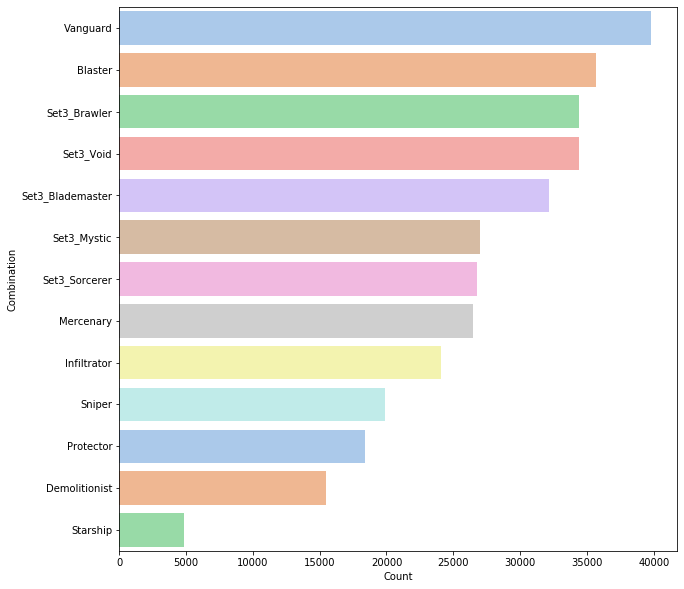

In [11]:
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(x = 'Count', y = 'Combination', data=Classes, palette = 'pastel')
plt.show()

#### - 계열 시너지 TOP3: 1. Chrono(시공간), 2. Cybernetic(사이버네틱), 3. DarkStar(암흑의 별)

In [33]:
Origin = all_combi.iloc[[0, 1, 3, 4, 5, 8, 10, 12, 17, 22], :].reset_index(drop=True)
Origin

,Combination,Count
0,Chrono,58096
1,Cybernetic,44289
2,DarkStar,37737
3,Set3_Celestial,36152
4,Valkyrie,35796
5,Set3_Void,34385
6,Rebel,33231
7,SpacePirate,31186
8,StarGuardian,21061
9,MechPilot,11557


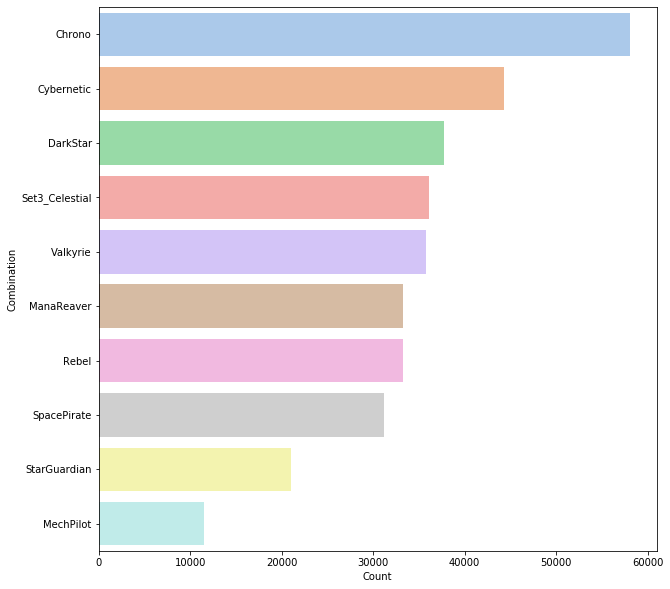

In [13]:
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(x = 'Count', y = 'Combination', data=Origin, palette = 'pastel')
plt.show()

#### - 시너지 조합

In [14]:
team_comps = gm.combination.value_counts().to_frame()
team_comps.head()

,combination
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 2, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Valkyrie': 1}",3489
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 3, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Starship': 1, 'Valkyrie': 1}",1503
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, 'Rebel': 2, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1}",1325
"{'Chrono': 2, 'DarkStar': 1, 'Rebel': 1, 'Set3_Mystic': 2, 'Set3_Sorcerer': 4, 'Set3_Void': 1, 'StarGuardian': 3, 'Vanguard': 2}",763
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 3, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Valkyrie': 1}",724


#### - 챔피언 사용 순위 TOP3: 1. Vi(바이), 2. Blitzcrank(블리츠크랭크), 3. Kassadin(카사딘)

In [15]:
champ = gm.champion.apply(lambda x: re.findall('[a-zA-Z]+',x)).to_frame()
champ

,champion
0,"[Malphite, items, star, Blitzcrank, items, sta..."
1,"[Fiora, items, star, Leona, items, star, Lucia..."
2,"[JarvanIV, items, star, Sona, items, star, Rak..."
3,"[KhaZix, items, star, KaiSa, items, star, Anni..."
4,"[Leona, items, star, Mordekaiser, items, star,..."
...,...
79995,"[Malphite, items, star, Graves, items, star, B..."
79996,"[Blitzcrank, items, star, Rumble, items, star,..."
79997,"[Malphite, items, star, Graves, items, star, B..."
79998,"[Malphite, items, star, Graves, items, star, B..."


In [16]:
all_champ = Counter()
for champ in champ.champion:
    all_champ += Counter(champ)

all_champ

Counter({'Malphite': 20901,
         'items': 635376,
         'star': 635376,
         'Blitzcrank': 26083,
         'Lucian': 11996,
         'Ezreal': 23404,
         'Vi': 27141,
         'Jinx': 18452,
         'ChoGath': 20907,
         'Kayle': 18018,
         'MissFortune': 22850,
         'Fiora': 9390,
         'Leona': 11513,
         'Irelia': 15420,
         'Thresh': 15390,
         'Ekko': 8090,
         'JarvanIV': 7952,
         'Sona': 10951,
         'Rakan': 10802,
         'XinZhao': 6965,
         'Neeko': 6252,
         'Karma': 9121,
         'Ashe': 17904,
         'Soraka': 11368,
         'Lulu': 12011,
         'KhaZix': 9236,
         'KaiSa': 9988,
         'Annie': 8688,
         'Shaco': 10172,
         'Rumble': 10155,
         'Lux': 13748,
         'Fizz': 9136,
         'Mordekaiser': 9756,
         'Jayce': 14294,
         'WuKong': 22986,
         'Jhin': 12477,
         'Yasuo': 3289,
         'MasterYi': 3263,
         'Gangplank': 4969,
        

In [17]:
all_champ = pd.DataFrame.from_dict(all_champ, orient='index', columns=['Count'])
all_champ = all_champ.drop(['star','items']).reset_index()
all_champ = all_champ.sort_values(['Count'], ascending=False)
all_champ.columns = ['Champ','Count']
all_champ = all_champ.reset_index(drop=True)
all_champ

,Champ,Count
0,Vi,27141
1,Blitzcrank,26083
2,Kassadin,24003
3,Ezreal,23404
4,WuKong,22986
5,MissFortune,22850
6,ChoGath,20907
7,Malphite,20901
8,Shen,19266
9,Jinx,18452


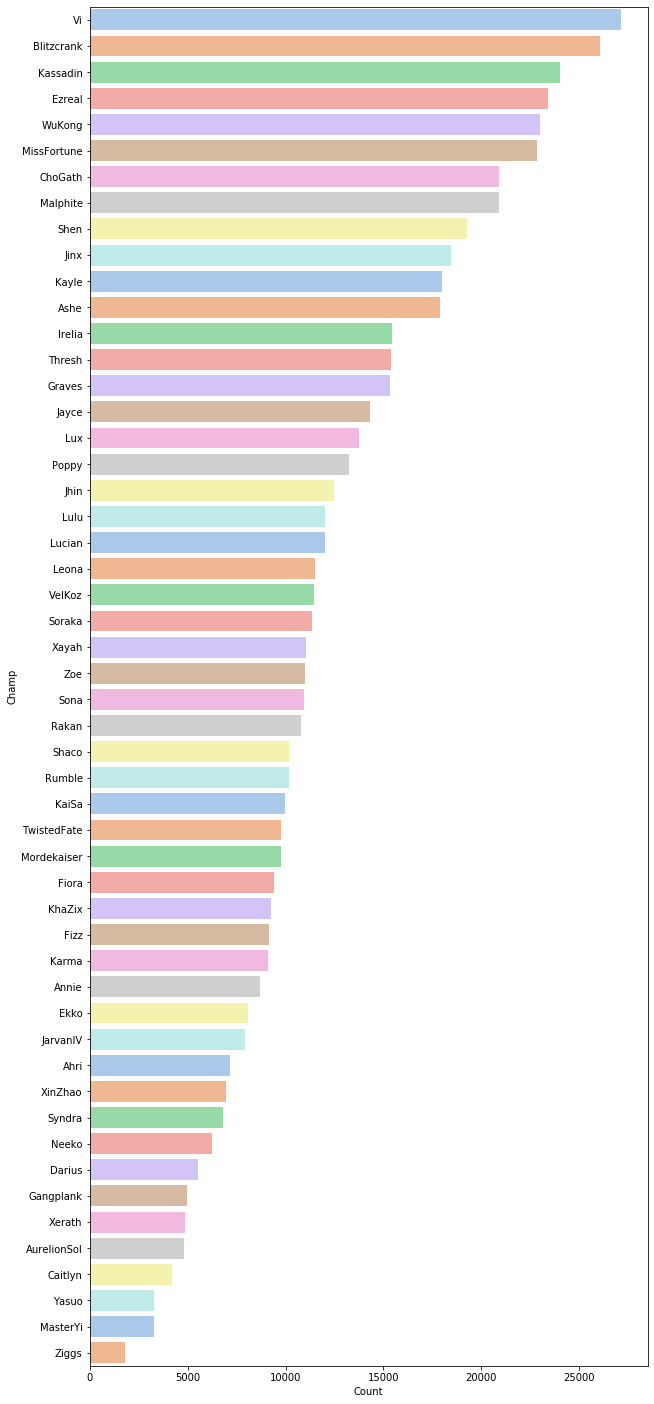

In [18]:
plt.rcParams['figure.figsize'] = (10,25)
sns.barplot(x = 'Count', y = 'Champ', data=all_champ, palette = 'pastel')
plt.show()

### 순위 TOP 4

In [19]:
top4_combi = gm[gm.Ranked<=4].combination.apply(lambda x: re.findall('[a-zA-Z]+[0-9]?_?[a-zA-Z]+',x)).to_frame()
top4_combi

,combination
0,"[Blaster, Chrono, Cybernetic, Mercenary, Rebel..."
1,"[Blaster, Chrono, Cybernetic, Infiltrator, Man..."
2,"[DarkStar, Protector, Rebel, Set3_Celestial, S..."
3,"[DarkStar, Demolitionist, Infiltrator, MechPil..."
8,"[DarkStar, Demolitionist, Infiltrator, MechPil..."
...,...
79987,"[Chrono, Cybernetic, DarkStar, Infiltrator, Ma..."
79992,"[Chrono, DarkStar, Rebel, Set3_Mystic, Set3_So..."
79993,"[Chrono, Cybernetic, DarkStar, ManaReaver, Pro..."
79994,"[Chrono, DarkStar, Infiltrator, ManaReaver, Re..."


In [20]:
top4_all_combi = Counter()
for combi in top4_combi.combination:
    top4_all_combi += Counter(combi)

top4_all_combi

Counter({'Blaster': 18697,
         'Chrono': 30141,
         'Cybernetic': 23146,
         'Mercenary': 15990,
         'Rebel': 17000,
         'Set3_Blademaster': 16883,
         'Set3_Brawler': 17415,
         'Set3_Void': 17921,
         'Valkyrie': 19657,
         'Infiltrator': 12161,
         'ManaReaver': 17423,
         'Vanguard': 19211,
         'DarkStar': 19442,
         'Protector': 9293,
         'Set3_Celestial': 18833,
         'Set3_Mystic': 14671,
         'Sniper': 9874,
         'StarGuardian': 10758,
         'Demolitionist': 7901,
         'MechPilot': 5847,
         'Set3_Sorcerer': 13077,
         'SpacePirate': 16004,
         'Starship': 3462,
         'TemplateTrait': 8105})

#### - 전체 시너지 TOP3: 1. Chrono(시공간), 2. Cybernetic(사이버네틱), 3. Valkyrie(발키리)

In [21]:
top4_all_combi = pd.DataFrame.from_dict(top4_all_combi, orient='index', columns=['Count']).reset_index()
top4_all_combi = top4_all_combi.sort_values(['Count'], ascending=False)
top4_all_combi.columns = ['Combination','Count']
top4_all_combi = top4_all_combi.reset_index(drop=True)
top4_all_combi

,Combination,Count
0,Chrono,30141
1,Cybernetic,23146
2,Valkyrie,19657
3,DarkStar,19442
4,Vanguard,19211
5,Set3_Celestial,18833
6,Blaster,18697
7,Set3_Void,17921
8,ManaReaver,17423
9,Set3_Brawler,17415


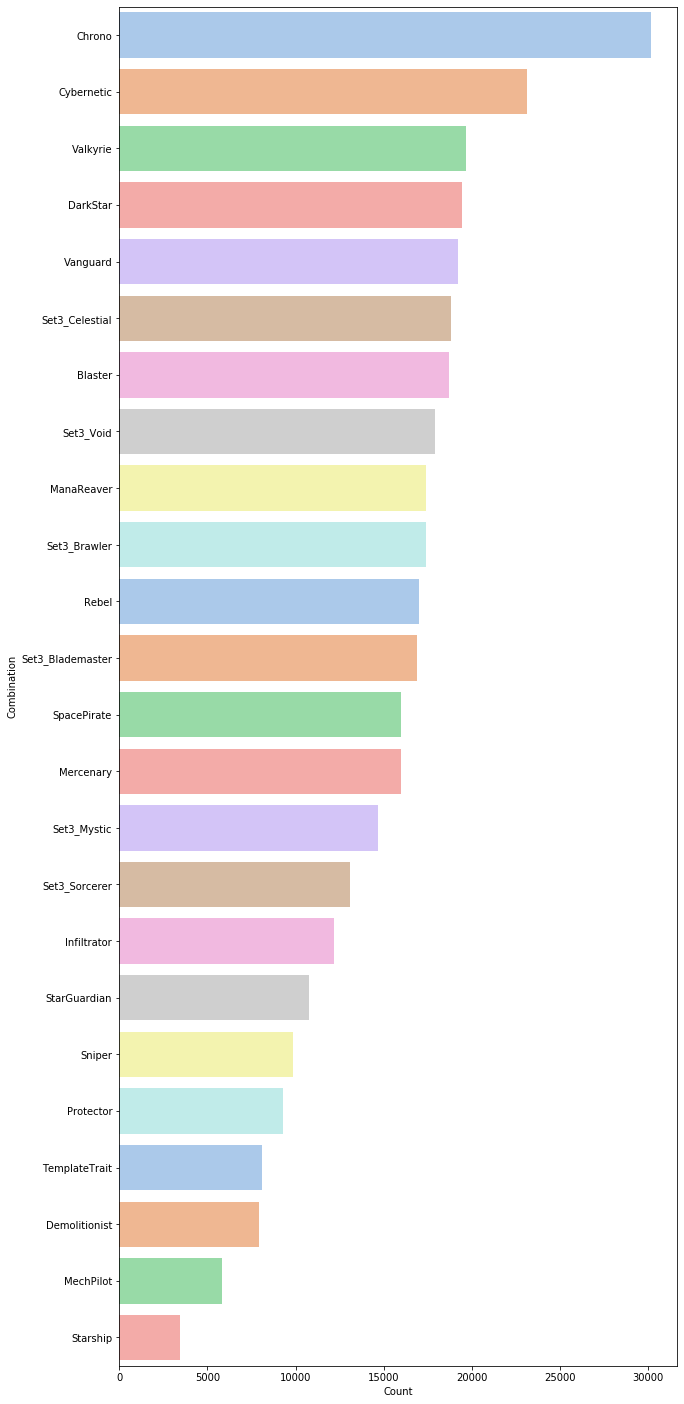

In [22]:
plt.rcParams['figure.figsize'] = (10,25)
sns.barplot(x = 'Count', y = 'Combination', data=top4_all_combi, palette = 'pastel')
plt.show()

#### - 직업 시너지 TOP3: 1. Vanguard(선봉대), 2. Blaster(총잡이), 3. ManaReaver(마나약탈자)

In [34]:
top4_Classes = top4_all_combi.iloc[[4,6,8,9,11,13,14,15,16,18,19,21,23], :].reset_index(drop=True)
top4_Classes

,Combination,Count
0,Vanguard,19211
1,Blaster,18697
2,ManaReaver,17423
3,Set3_Brawler,17415
4,Set3_Blademaster,16883
5,Mercenary,15990
6,Set3_Mystic,14671
7,Set3_Sorcerer,13077
8,Infiltrator,12161
9,Sniper,9874


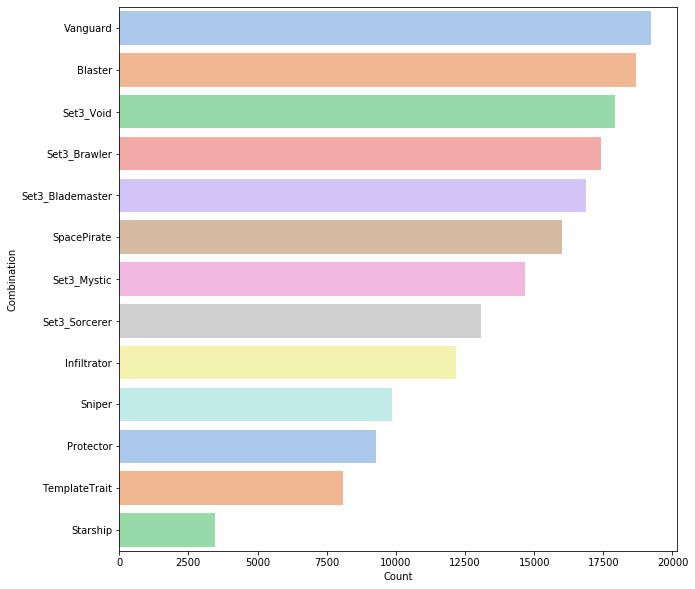

In [24]:
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(x = 'Count', y = 'Combination', data=top4_Classes, palette = 'pastel')
plt.show()

#### - 계열 시너지 TOP3: 1. Chrono(시공간), 2. Cybernetic(사이버네틱), 3. Valkyrie(발키리)

In [35]:
top4_Origin = top4_all_combi.iloc[[0,1,2,3,5,7,10,12,17,22], :].reset_index(drop=True)
top4_Origin

,Combination,Count
0,Chrono,30141
1,Cybernetic,23146
2,Valkyrie,19657
3,DarkStar,19442
4,Set3_Celestial,18833
5,Set3_Void,17921
6,Rebel,17000
7,SpacePirate,16004
8,StarGuardian,10758
9,MechPilot,5847


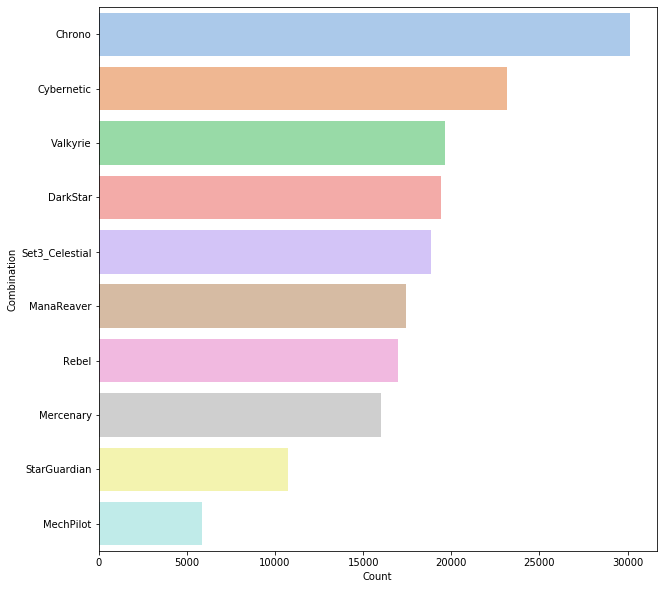

In [26]:
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(x = 'Count', y = 'Combination', data=top4_Origin, palette = 'pastel')
plt.show()

#### - 시너지 조합

In [27]:
team_comps = gm[gm.Ranked<=4].combination.value_counts().to_frame()
team_comps.head()

,combination
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 2, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Valkyrie': 1}",1531
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 3, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Starship': 1, 'Valkyrie': 1}",1280
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 3, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Valkyrie': 1}",401
"{'Blaster': 2, 'Chrono': 4, 'ManaReaver': 2, 'Mercenary': 1, 'Set3_Blademaster': 3, 'Set3_Celestial': 2, 'Valkyrie': 2, 'Vanguard': 1}",348
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 2, 'Set3_Blademaster': 1, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Valkyrie': 2}",346


#### - 챔피언 사용 순위 TOP3: 1. Vi(바이), 2. MissFortune(미스포츈), 3. Blitzcrank(블리츠크랭크)

In [28]:
top4_champ = gm[gm.Ranked<=4].champion.apply(lambda x: re.findall('[a-zA-Z]+',x)).to_frame()
top4_champ

,champion
0,"[Malphite, items, star, Blitzcrank, items, sta..."
1,"[Fiora, items, star, Leona, items, star, Lucia..."
2,"[JarvanIV, items, star, Sona, items, star, Rak..."
3,"[KhaZix, items, star, KaiSa, items, star, Anni..."
8,"[KhaZix, items, star, KaiSa, items, star, Anni..."
...,...
79987,"[KaiSa, items, star, Shen, items, star, Jayce,..."
79992,"[TwistedFate, items, star, Poppy, items, star,..."
79993,"[Caitlyn, items, star, JarvanIV, items, star, ..."
79994,"[KhaZix, items, star, Blitzcrank, items, star,..."


In [29]:
top4_cham = Counter()
for champ in top4_champ.champion:
    top4_cham += Counter(champ)

top4_cham

Counter({'Malphite': 10950,
         'items': 331223,
         'star': 331223,
         'Blitzcrank': 13260,
         'Lucian': 5372,
         'Ezreal': 12122,
         'Vi': 14365,
         'Jinx': 9769,
         'ChoGath': 11242,
         'Kayle': 9905,
         'MissFortune': 14010,
         'Fiora': 4836,
         'Leona': 5362,
         'Irelia': 8117,
         'Thresh': 9814,
         'Ekko': 4968,
         'JarvanIV': 4229,
         'Sona': 5252,
         'Rakan': 5715,
         'XinZhao': 3373,
         'Neeko': 3019,
         'Karma': 4746,
         'Ashe': 9178,
         'Soraka': 6268,
         'Lulu': 8047,
         'KhaZix': 4327,
         'KaiSa': 4709,
         'Annie': 4297,
         'Shaco': 4926,
         'Rumble': 5034,
         'Lux': 7438,
         'Fizz': 4721,
         'Ziggs': 713,
         'Yasuo': 1327,
         'MasterYi': 1337,
         'Gangplank': 2818,
         'AurelionSol': 3446,
         'Graves': 8128,
         'Mordekaiser': 4333,
         'Jayce': 6

In [30]:
top4_cham = pd.DataFrame.from_dict(top4_cham, orient='index', columns=['Count'])
top4_cham = top4_cham.drop(['star','items']).reset_index()
top4_cham = top4_cham.sort_values(['Count'], ascending=False)
top4_cham.columns = ['Champ','Count']
top4_cham = top4_cham.reset_index(drop=True)
top4_cham

,Champ,Count
0,Vi,14365
1,MissFortune,14010
2,Blitzcrank,13260
3,Kassadin,12469
4,Ezreal,12122
5,WuKong,11767
6,ChoGath,11242
7,Malphite,10950
8,Kayle,9905
9,Thresh,9814


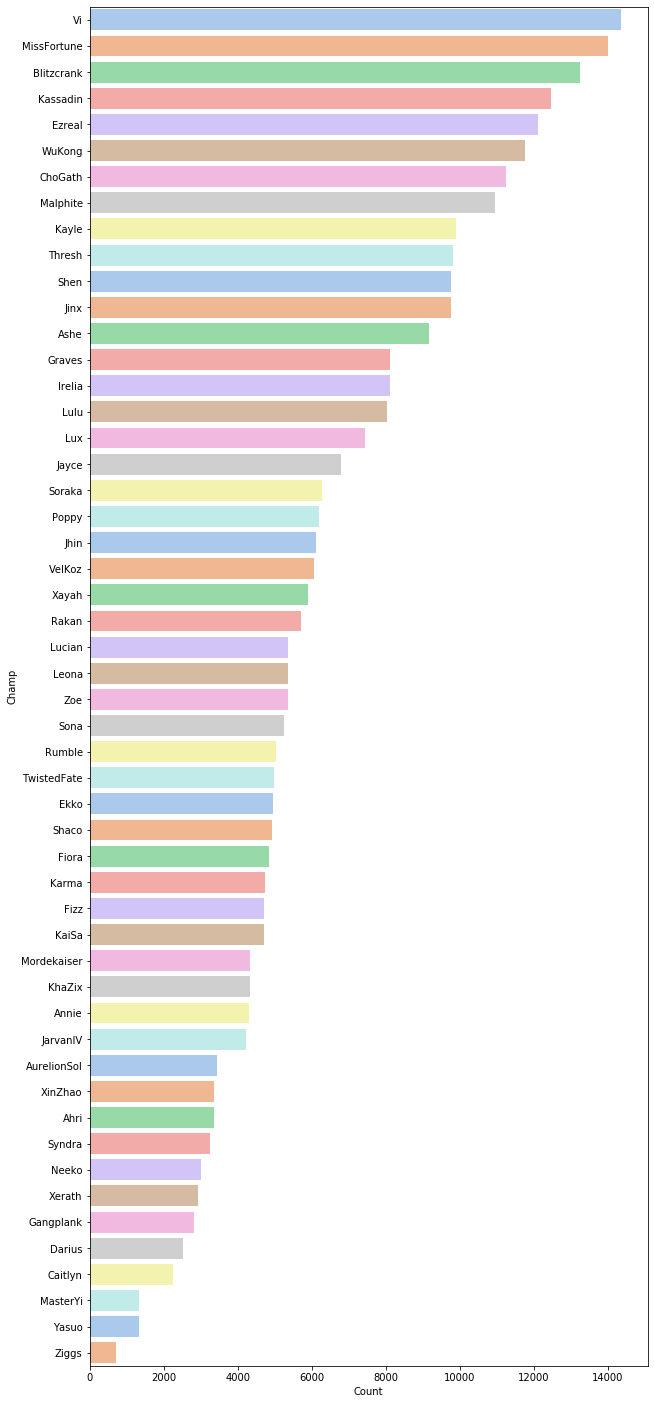

In [31]:
plt.rcParams['figure.figsize'] = (10,25)
sns.barplot(x = 'Count', y = 'Champ', data=top4_cham, palette = 'pastel')
plt.show()